# Electrocardiogram Sınıflandırması

## (1) Electrocardiogramlar

👇 [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) veri setini içe aktarın ve ilk 5 satırını görüntüleyin

In [11]:
import pandas as pd
pd.set_option("display.max_columns", None)

# Veriyi indir ve kaydet
!curl -s https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_dataset.csv -o data/electrocardiograms.csv

# Oku
df = pd.read_csv('data/electrocardiograms.csv')

💓 Veri setinin her gözlemi, bir hastanın electrocardiogram (ECG)'ından alınan ölçülmüş kalp atışları dizisidir.

🎯 Hedef ikili değerlidir ve kalp atışının şunları gösterip göstermediğini tanımlar:
* kardiyovasküler hastalık riski 🔴 (1)
* yoksa risk yok 🟢 (0)

## (2) Veri Keşfi

❓ **Soru** ❓

Sayıların neyi temsil ettiği hakkında görsel bir fikir edinmek için her hedef sınıfından bir gözlemi çizin.

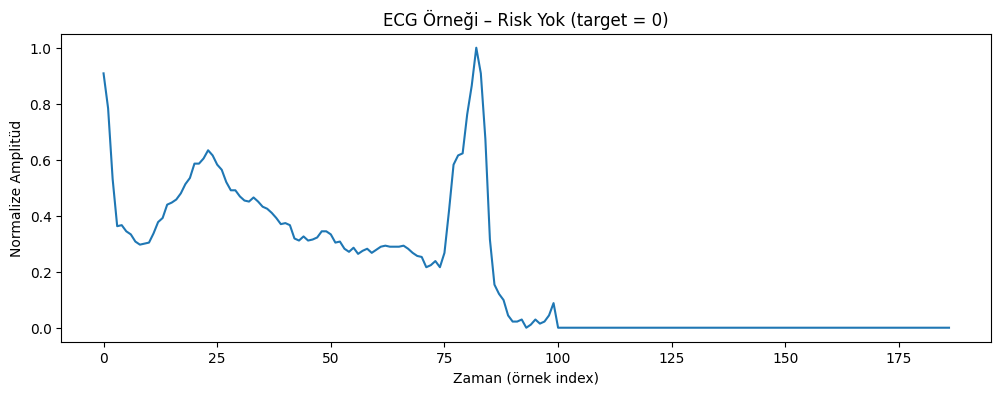

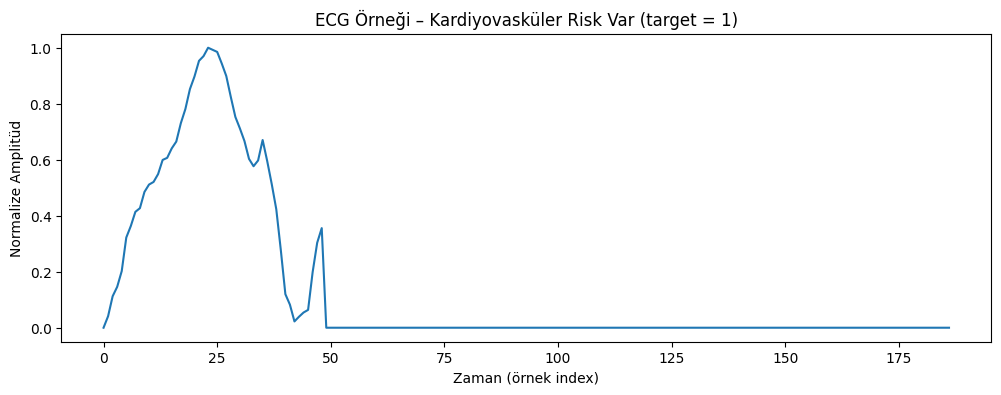

In [12]:
import matplotlib.pyplot as plt

# Feature ve target ayırımı
X = df.drop("target", axis=1)
y = df["target"]

# Risk yok (0) sınıfından bir örnek
sample_0 = X[y == 0].iloc[0]

# Risk var (1) sınıfından bir örnek
sample_1 = X[y == 1].iloc[0]

plt.figure(figsize=(12, 4))
plt.plot(sample_0.values)
plt.title("ECG Örneği – Risk Yok (target = 0)")
plt.xlabel("Zaman (örnek index)")
plt.ylabel("Normalize Amplitüd")
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(sample_1.values)
plt.title("ECG Örneği – Kardiyovasküler Risk Var (target = 1)")
plt.xlabel("Zaman (örnek index)")
plt.ylabel("Normalize Amplitüd")
plt.show()



❓ **Sorular** ❓

* Kaç tane riskli kalp atışı gözlemi var? Cevabınızı `at_risk_count` olarak kaydedin.

In [13]:
at_risk_count = (df["target"] == 1).sum()
at_risk_count

np.int64(1448)

* Kaç tane sağlıklı kalp atışı gözlemi var? Cevabınızı `healthy_count` olarak kaydedin.

In [14]:
healthy_count = (df["target"] == 0).sum()
healthy_count

np.int64(18117)

👩🏻‍🏫 Belirli durumlarda, sınıf dengesi gerçek sınıf dağılımını temsil eder. Burada durum budur: insanların büyük çoğunluğunun aslında sağlıklı kalpleri vardır. Bu durumda, modeli gerçekliğe dayalı olarak eğitmek için sınıf dağılımını koruruz ve modelleme yaklaşımımızı buna göre uyarlarız.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Kodunuzu kontrol edin**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.74s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



##  (3) Logistic Regression

🎯 Göreviniz **kardiyovasküler hastalık riski altındaki kalp atışlarını işaretlemektir.**

👇 Bu görevde `LogisticRegression`'ın performansını araştırarak başlayalım. Modeli aşağıdaki metriklerde değerlendirmek için ***çapraz doğrulama kullanın***:
- Doğruluk (Accuracy)
- Hatırlama (Recall)
- Kesinlik (Precision)
- F1

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = df.drop("target", axis=1)
y = df["target"]

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

scores = cross_validate(
    pipe,
    X,
    y,
    cv=5,
    scoring=["accuracy", "recall", "precision", "f1"]
)

print(scores)


{'fit_time': array([2.73442125, 2.05971646, 2.01638556, 2.0239222 , 2.39869213]), 'score_time': array([0.04473567, 0.04611731, 0.04696512, 0.04494047, 0.04349518]), 'test_accuracy': array([0.93943266, 0.93994378, 0.93764375, 0.93943266, 0.94019934]), 'test_recall': array([0.35172414, 0.39310345, 0.36551724, 0.3633218 , 0.34602076]), 'test_precision': array([0.67549669, 0.65895954, 0.63855422, 0.66455696, 0.68965517]), 'test_f1': array([0.46258503, 0.4924406 , 0.46491228, 0.46979866, 0.46082949])}


❓ **Soru (Doğru tahminlerin oranı)** ❓ 

Bu model için doğru tahminlerin oranı nedir? Cevabınızı `correct_pred_ratio` değişken adıyla kaydedin.

In [18]:
correct_pred_ratio = scores["test_accuracy"].mean()
correct_pred_ratio


np.float64(0.9393304370048556)

❓ **Soru (Riskli hastaları işaretleme yeteneği)** ❓ 

Model riskli kalp atışlarının yüzde kaçını işaretleyebiliyor? Cevabınızı `flag_ratio` değişken adıyla kaydedin.

In [19]:
flag_ratio = scores["test_recall"].mean()
flag_ratio


np.float64(0.363937477627968)

❓ **Soru (Doğru işaretleme yeteneği)** ❓ 

Model riskli bir kalp atışı sinyali verdiğinde, ne sıklıkta doğrudur? Cevabınızı `correct_detection_ratio` değişken adıyla kaydedin.

In [20]:
correct_detection_ratio = scores["test_precision"].mean()
correct_detection_ratio


np.float64(0.6654445155241111)

❓ **Soru (Çok fazla yanlış alarm olmadan mümkün olduğunca çok riskli hastayı tespit etme)** ❓ 

Modelin yanlış alarmları sınırlarken mümkün olduğunca çok riskli kalp atışını işaretleme yeteneği nedir? Cevabınızı `aggregated_metric` değişken adıyla kaydedin.

In [21]:
aggregated_metric = scores["test_f1"].mean() #f1 skorunu soruyordu aslında.
aggregated_metric


np.float64(0.4701132140545317)

🧪 **Kodunuzu kontrol edin**

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commit -m 'Completed logistic_regression_evaluation step'


▶️ Devam etmeden önce aşağıdaki hücreyi çalıştırın:

In [23]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 36.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Karışıklık Matrisi

👇 `ConfusionMatrixDisplay` ([dokümantasyon](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)) kullanarak, Logistic Regression modelinin tahmin dökümünü görselleştirin.

<details>
<summary>💡 İpuçları</summary>

    
1. [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)    
2. [from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
    
- Veri setinizi [`train-test-split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ile ayırmak ve test setindeki karışıklık matrisine bakmak için **Holdout yöntemine** geri dönmeyi unutmayın.  
</details>

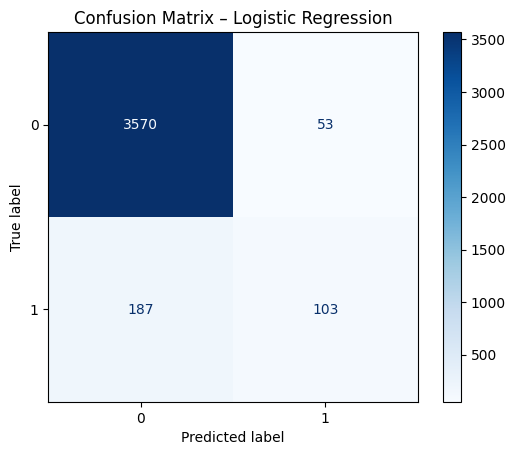

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # sınıf oranlarını korur, dengesiz olduğundan önemli.
)

# Logistic Regression Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

# Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    pipe,
    X_test,
    y_test,
    cmap="Blues"
)

plt.title("Confusion Matrix – Logistic Regression")
plt.show()



ℹ️ Karışıklık matrisi, modelin sınıf dengesizliğinden etkilendiğini göstermelidir: kalp atışlarını çoğu zaman sağlıklı olarak tahmin eder. Bu davranış nedeniyle, model sıklıkla doğrudur ve **yüksek doğruluğa** sahiptir. Ancak bu aynı zamanda birçok riskli kalp atışını kaçırmasına da neden olur: **kötü hatırlama** oranına sahiptir...

👉 Bu nedenle bu model **riskli gözlemleri işaretleme** görevinde zayıftır.

❗️ Doğrulukla kandırılmayın ve görevinize karşılık gelen metriğe bakın! ❗️

## (5) KNN Sınıflandırıcı

❓ **Soru (Sınıflandırma Model Seçimi)** ❓ 

Varsayılan bir KNN sınıflandırıcı, riskli gözlemleri işaretleme görevinde daha iyi performans gösterir mi?

Cevabınızı "KNN" veya "LogisticRegression" olarak `best_model` altında kaydedin.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X = df.drop("target", axis=1)
y = df["target"]

knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())  # varsayılan K
])

knn_recall = cross_val_score(
    knn_pipe,
    X,
    y,
    cv=5,
    scoring="recall"
).mean()

knn_recall

best_model = "KNN"


💪 Bu ECG veri seti için, KNN Sınıflandırıcı LogisticRegression'dan çok daha yüksek hatırlama oranına sahip olmalı ve bu nedenle görev için daha uygun.

🧪 **Kodunuzu kontrol edin**

In [27]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



## (6) Sınıflandırma Raporu

Daha yüksek hatırlama oranı sayesinde KNN modelini seçtiğimize göre, şimdi diğer sınıflandırma performans metriklerine bakalım.

❓ **Soru (Sınıflandırma Raporu)** ❓

KNN modelinin [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)'unu yazdırın.

<details>
    <summary> 💡 <i>İpucu</i>  </summary>
    
* Modelin tahminlerini bir `classification_report`'a geçirmeniz gerekecek.
    
* SkLearn'ün [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) yardımcı olabilir 😉
</details>

In [29]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(
    knn_pipe,
    X,
    y,
    cv=5
)

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18117
           1       0.93      0.83      0.87      1448

    accuracy                           0.98     19565
   macro avg       0.96      0.91      0.93     19565
weighted avg       0.98      0.98      0.98     19565



❓ **Soru (Raporu okuma)** ❓

Riskli olarak tahmin edilen kalp atışları arasında, doğru tahminlerin oranı nedir?

Matematiksel terimlerle, raporda $ \frac{TP}{TP + FP} $ oranını okuyabilir misiniz? Bu sınıflandırma metriğinin adı nedir?

Cevabınızı `correct_at_risk_predictions` altında float olarak kaydedin

In [30]:
from sklearn.metrics import precision_score

correct_at_risk_predictions = precision_score(y, y_pred)
correct_at_risk_predictions


0.9279628195197521

🧪 **Kodunuzu kontrol edin**

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_precision.py::TestPrecision::test_precision PASSED                  [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master



## (7) Tahmin

❓ **Soru (Tahmin etme)** ❓

Bir hasta ikinci görüş için size geliyor çünkü kalp atışlarına dayanarak bu hastanın risk altında olabileceği söylenmiş.

Optimal modelinize göre, o risk altında mı yoksa değil mi?

Modelinizin tahminini "at risk" veya "healthy" olarak `prediction` değişken adı altında kaydedin.

In [32]:
new_patient = pd.read_csv('https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,0.321995,0.192744,0.147392,0.129252,0.099773,0.092971,0.068027,0.068027,0.061224,0.040816,0.034014,0.027211,0.013605,0.00907,0.0,0.006803,0.0,0.011338,0.015873,0.031746,0.054422,0.092971,0.113379,0.160998,0.185941,0.208617,0.219955,0.240363,0.231293,0.226757,0.231293,0.238095,0.235828,0.235828,0.24263,0.249433,0.253968,0.258503,0.258503,0.256236,0.253968,0.265306,0.263039,0.272109,0.265306,0.260771,0.263039,0.267574,0.267574,0.274376,0.258503,0.265306,0.263039,0.267574,0.272109,0.263039,0.260771,0.274376,0.269841,0.274376,0.276644,0.269841,0.267574,0.274376,0.292517,0.303855,0.321995,0.337868,0.337868,0.340136,0.319728,0.297052,0.285714,0.269841,0.269841,0.274376,0.269841,0.274376,0.267574,0.260771,0.371882,0.639456,0.959184,0.807256,0.444444,0.29932,0.272109,0.278912,0.253968,0.258503,0.251701,0.256236,0.247166,0.265306,0.265306,0.267574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df.drop("target", axis=1)
y = df["target"]

final_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())  # varsayılan K (önceki seçim)
])

final_knn.fit(X, y)


pred = final_knn.predict(new_patient)[0]
pred


prediction = "at risk" if pred == 1 else "healthy"
prediction


'at risk'

🧪 **Kodunuzu kontrol edin**

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction_at_risk PASSED       [100%]

============================== 1 passed in 1.46s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



🏁 Tebrikler!

💾 Notebook'unuzu git add/commit/push yapmayı unutmayın...

🚀 ... ve bir sonraki zorluğa geçin!